In [ ]:
# 필요한 라이브러리 불러오기

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 데이터 불러오기

df0 = pd.read_csv('/content/drive/MyDrive/신입기수 프로젝트/Dataset/rawdata.csv')
df0.head()

,날짜,현재수위,유입량,저수량,공용량,방류량,강화대교_조위,청담대교_유량,잠수교_유량,한강대교_유량,행주대교_유량,대곡교_강수량,진관교_강수량,송정동_강수량,청담대교_수위,잠수교_수위,한강대교_수위,행주대교_수위
0,2012-05-01 00:00,24.800,555.0,219.07,24.93,555.0,445.0,469.05,0.0,729.80,540.18,0.0,0.0,0.0,310.7,300.2,290.0,275.3
1,2012-05-01 00:10,24.794,464.6,218.86,25.15,562.9,449.0,498.00,0.0,731.48,540.18,0.0,0.0,0.0,314.7,300.2,290.0,275.3
2,2012-05-01 00:20,24.789,478.1,218.69,25.31,576.4,451.0,490.68,0.0,726.42,540.18,0.0,0.0,0.0,313.7,301.2,290.0,275.3
3,2012-05-01 00:30,24.789,464.8,218.69,25.31,563.1,452.0,476.21,0.0,726.42,552.17,0.0,0.0,0.0,311.7,301.2,290.0,276.3
4,2012-05-01 00:40,24.789,478.1,218.69,25.31,576.4,450.0,476.21,0.0,707.17,564.29,0.0,0.0,0.0,311.7,301.2,291.0,277.3


In [ ]:
# raw data 보존하기
df = df0.copy()
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276336 entries, 0 to 276335
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   날짜       276336 non-null  object 
 1   현재수위     275593 non-null  float64
 2   유입량      275593 non-null  float64
 3   저수량      275593 non-null  float64
 4   공용량      275593 non-null  float64
 5   방류량      275593 non-null  float64
 6   강화대교_조위  271409 non-null  float64
 7   청담대교_유량  259956 non-null  float64
 8   잠수교_유량   79487 non-null   float64
 9   한강대교_유량  275057 non-null  float64
 10  행주대교_유량  276277 non-null  float64
 11  대곡교_강수량  276336 non-null  float64
 12  진관교_강수량  276336 non-null  float64
 13  송정동_강수량  276336 non-null  float64
 14  청담대교_수위  276277 non-null  float64
 15  잠수교_수위   276277 non-null  float64
 16  한강대교_수위  276277 non-null  float64
 17  행주대교_수위  276277 non-null  float64
dtypes: float64(17), object(1)
memory usage: 37.9+ MB


In [ ]:
# 날짜를 index로 바꾸고 dtype을 datetime으로 바꾸기
df.set_index(keys = ['날짜'], inplace = True)
df.index = pd.to_datetime(df.index, format = '%Y-%m-%d %H:%M')

In [ ]:
df.head()

,현재수위,유입량,저수량,공용량,방류량,강화대교_조위,청담대교_유량,잠수교_유량,한강대교_유량,행주대교_유량,대곡교_강수량,진관교_강수량,송정동_강수량,청담대교_수위,잠수교_수위,한강대교_수위,행주대교_수위
날짜,,,,,,,,,,,,,,,,,
2012-05-01 00:00:00,24.800,555.0,219.07,24.93,555.0,445.0,469.05,0.0,729.80,540.18,0.0,0.0,0.0,310.7,300.2,290.0,275.3
2012-05-01 00:10:00,24.794,464.6,218.86,25.15,562.9,449.0,498.00,0.0,731.48,540.18,0.0,0.0,0.0,314.7,300.2,290.0,275.3
2012-05-01 00:20:00,24.789,478.1,218.69,25.31,576.4,451.0,490.68,0.0,726.42,540.18,0.0,0.0,0.0,313.7,301.2,290.0,275.3
2012-05-01 00:30:00,24.789,464.8,218.69,25.31,563.1,452.0,476.21,0.0,726.42,552.17,0.0,0.0,0.0,311.7,301.2,290.0,276.3
2012-05-01 00:40:00,24.789,478.1,218.69,25.31,576.4,450.0,476.21,0.0,707.17,564.29,0.0,0.0,0.0,311.7,301.2,291.0,277.3


In [ ]:
# 유량, 수위 데이터셋 분리하기

df_intp = df[['잠수교_수위', '잠수교_유량', '청담대교_수위', '청담대교_유량', '한강대교_수위', '한강대교_유량', '행주대교_수위', '행주대교_유량']]

In [ ]:
df_intp.head()

,잠수교_수위,잠수교_유량,청담대교_수위,청담대교_유량,한강대교_수위,한강대교_유량,행주대교_수위,행주대교_유량
날짜,,,,,,,,
2012-05-01 00:00:00,300.2,0.0,310.7,469.05,290.0,729.80,275.3,540.18
2012-05-01 00:10:00,300.2,0.0,314.7,498.00,290.0,731.48,275.3,540.18
2012-05-01 00:20:00,301.2,0.0,313.7,490.68,290.0,726.42,275.3,540.18
2012-05-01 00:30:00,301.2,0.0,311.7,476.21,290.0,726.42,276.3,552.17
2012-05-01 00:40:00,301.2,0.0,311.7,476.21,291.0,707.17,277.3,564.29


In [ ]:
df_intp.isnull().sum()

잠수교_수위         59
잠수교_유량     196849
청담대교_수위        59
청담대교_유량     16380
한강대교_수위        59
한강대교_유량      1279
행주대교_수위        59
행주대교_유량        59
dtype: int64

In [ ]:
# 8개의 컬럼 중 결측치가 상대적으로 적은 6개의 column은 보간

df_intp['잠수교_수위'] = df_intp['잠수교_수위'].interpolate()
df_intp['청담대교_수위'] = df_intp['청담대교_수위'].interpolate()
df_intp['한강대교_수위'] = df_intp['한강대교_수위'].interpolate()
df_intp['행주대교_수위'] = df_intp['행주대교_수위'].interpolate()
df_intp['한강대교_유량'] = df_intp['한강대교_유량'].interpolate()
df_intp['행주대교_유량'] = df_intp['행주대교_유량'].interpolate()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
df_intp.isnull().sum()

잠수교_수위          0
잠수교_유량     196849
청담대교_수위         0
청담대교_유량     16380
한강대교_수위         0
한강대교_유량         0
행주대교_수위         0
행주대교_유량         0
dtype: int64

### 잠수교 수위-유량 관계 곡선

[참고 자료](https://seong6496.tistory.com/195)

[수위-유량 곡선 논문](https://koreascience.kr/article/JAKO201809454741042.pdf)



In [ ]:
# 결측치가 시작되는 날짜 확인

df_intp[df_intp['잠수교_유량'].isnull()]

,잠수교_수위,잠수교_유량,청담대교_수위,청담대교_유량,한강대교_수위,한강대교_유량,행주대교_수위,행주대교_유량
날짜,,,,,,,,
2014-10-31 15:30:00,275.2,NaN,286.7,314.01,273.0,322.51,269.3,471.08
2015-05-01 00:00:00,268.2,NaN,284.7,302.53,268.0,227.02,265.3,427.69
2015-05-01 00:10:00,268.2,NaN,284.7,302.53,268.0,267.56,265.3,427.69
2015-05-01 00:20:00,268.2,NaN,285.7,308.24,268.0,320.26,265.3,427.69
2015-05-01 00:30:00,268.2,NaN,286.7,314.01,268.0,271.61,265.3,427.69
...,...,...,...,...,...,...,...,...
2022-07-18 23:10:00,0.0,NaN,0.0,319.84,0.0,-456.41,0.0,974.40
2022-07-18 23:20:00,0.0,NaN,0.0,314.01,0.0,-717.30,0.0,1006.88
2022-07-18 23:30:00,0.0,NaN,0.0,387.55,0.0,-843.37,0.0,1039.90


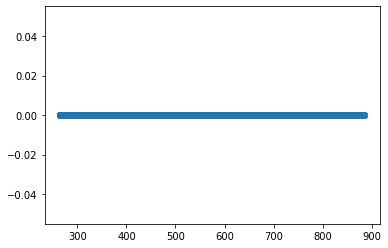

In [ ]:
# 결측치가 없는 구간에서의 수위-유량 곡선 확인

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

x = df_intp['잠수교_수위'][:'2014-10-31 15:30:00']
y = df_intp['잠수교_유량'][:'2014-10-31 15:30:00']

plt.scatter(x, y)
plt.show()

In [ ]:
# 결측치가 있는 곳은 0으로 채워져 있음
# 다른 대교들의 수위-유량 곡선으로 채울 수 없음
# (대교마다 폭, 깊이가 다르기 때문에 다른 대교의 수위-유량 곡선으로 예측한 잠수교 유량은 어차피 유의미한 독립변수가 되지 못할 것이라고 생각...)

### 청담대교 수위 - 유량 예측 곡선

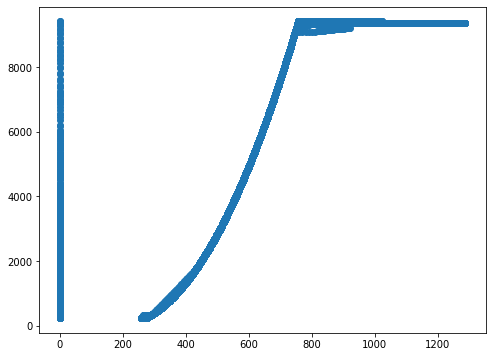

In [ ]:
x = df_intp['청담대교_수위']
y = df_intp['청담대교_유량']

plt.figure(figsize = (8, 6))
plt.scatter(x, y)
plt.show()

# 세로선은 뭐지..? 2022.6-7월은 수위가 0으로 되어 있기 때문

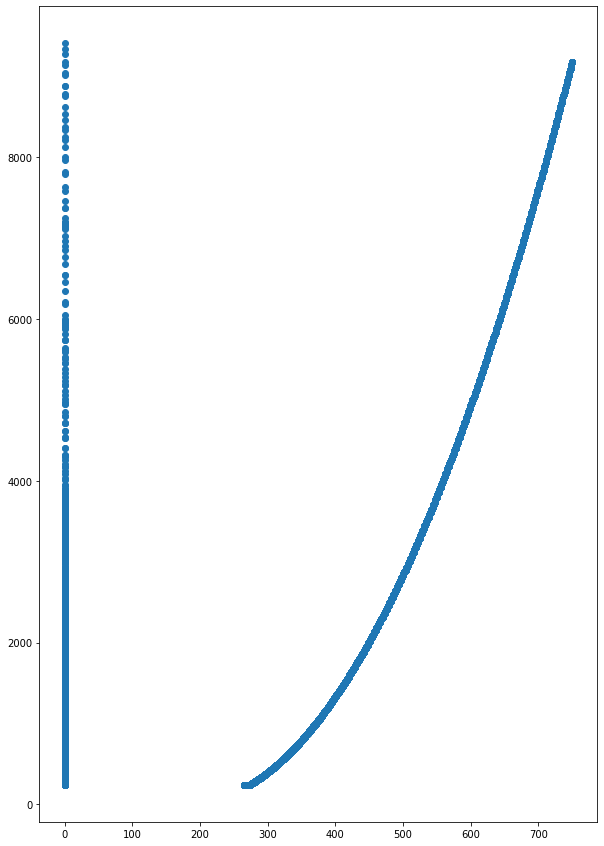

In [ ]:
# 수위가 700이 넘는 데이터는 이상치로 간주하고 다항회귀분석 실시

df_tmp = df_intp[df_intp['청담대교_수위'] < 750]

x = df_tmp['청담대교_수위']
y = df_tmp['청담대교_유량']

plt.figure(figsize = (10, 15))
plt.scatter(x, y)
plt.show()

In [ ]:
# from sklearn.preprocessing import PolynomialFeatures

# x = x.reshape(1, x.size)

# poly_feature = PolynomialFeatures(degree = 2, include_bias = False)
# x_poly = poly_feature.fit_transform(x)

In [ ]:
df_intp['청담대교_유량'] = df_intp['청담대교_유량'].interpolate()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


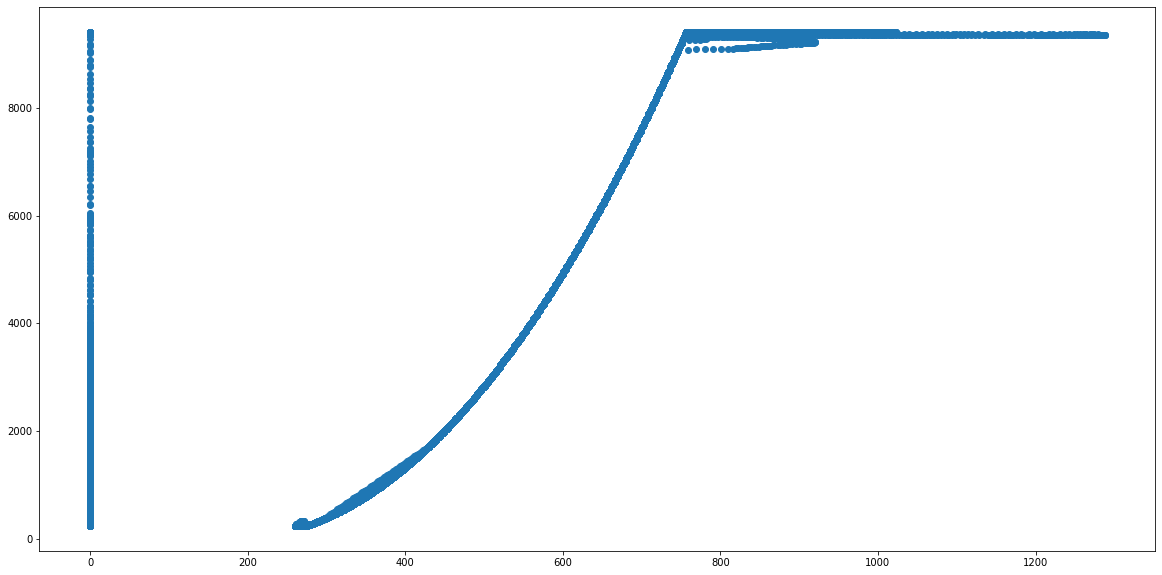

In [ ]:
x = df_intp['청담대교_수위']
y = df_intp['청담대교_유량']

plt.figure(figsize = (20, 10))
plt.scatter(x, y)
plt.show()

In [ ]:
df_intp.to_csv('/content/drive/MyDrive/신입기수 프로젝트/Dataset/청담대교_보간_일부.csv')

In [ ]:
df['잠수교_수위'] = df_intp['잠수교_수위']
df['청담대교_수위'] = df_intp['청담대교_수위']
df['청담대교_유량'] = df_intp['청담대교_유량']
df['한강대교_수위']= df_intp['한강대교_수위']
df['한강대교_유량']= df_intp['한강대교_유량']
df['행주대교_수위']= df_intp['행주대교_수위']
df['행주대교_유량']= df_intp['행주대교_유량']

In [ ]:
df.isnull().sum()

현재수위          743
유입량           743
저수량           743
공용량           743
방류량           743
강화대교_조위      4927
청담대교_유량         0
잠수교_유량     196849
한강대교_유량         0
행주대교_유량         0
대곡교_강수량         0
진관교_강수량         0
송정동_강수량         0
청담대교_수위         0
잠수교_수위          0
한강대교_수위         0
행주대교_수위         0
dtype: int64

In [ ]:
df.to_csv('/content/drive/MyDrive/신입기수 프로젝트/Dataset/잠수교_유량_수위_보간/청담대교_보간.csv')